In [38]:
import pandas as pd

In [40]:
df3 = pd.read_excel(r"C:/Users/smp/OneDrive - Grupo JJChicolino/THE POWER/PROYECTOFINALEDA/data/raw/presupuesto2024.xlsx")


In [5]:
df3.sample(5)

,Cod. Empresa,Cod. Macrofamilia,Macrofamilia,Cod.Famila,Familia,Cod.Subfamilia,Subfamilia,Tipo Cliente,Ventas (€),Margen (€),...,Marzo,Abril,Mayo,Junio,Julio,Agosto,Septiembre,Octubre,Noviembre,Diciembre
219,5,MF8,Maquinaria y SAT,F35,Consumibles SAT,IPF2,REPUESTOS IMPRESORA TERMICA INTERMEC PF2,NACIONAL,12135.816000,NaN,...,0.088462,0.053022,0.056983,0.140086,0.042259,0.070409,0.091994,0.114753,0.073405,0.184458
367,21,MFR06,Calderería Plastica y Metálica,FR06A,Calderería Plástica,CP2,CUSTOMIZADOS CUSTOM MOLDING,EXPORTACION,590.000000,NaN,...,0.056142,0.020007,0.026017,0.034243,0.027450,0.382581,0.038300,0.031006,0.029181,0.240717
268,5,MF8,Maquinaria y SAT,FR04D,Servicios SAT,SVS,SERVICIOS VARIOS SAT,EXPORTACION,4105.090909,NaN,...,0.211341,0.025147,0.030149,0.044620,0.138439,0.189036,0.029799,0.038935,0.046717,0.131478
501,21,MFR02,Vruma,FR02B,Equipamiento,V10,ACCESORIOS,EXPORTACION,58.000000,NaN,...,0.036261,0.075248,0.206768,0.207289,0.207892,0.148789,0.047948,0.009929,0.003009,0.048123
231,5,MF8,Maquinaria y SAT,F35,Consumibles SAT,PPM,REPUESTOS PRECINTADORA,NACIONAL,1677.312000,NaN,...,0.088462,0.053022,0.056983,0.140086,0.042259,0.070409,0.091994,0.114753,0.073405,0.184458


In [41]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 25 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Cod. Empresa       505 non-null    int64  
 1   Cod. Macrofamilia  505 non-null    object 
 2   Macrofamilia       505 non-null    object 
 3   Cod.Famila         505 non-null    object 
 4   Familia            505 non-null    object 
 5   Cod.Subfamilia     505 non-null    object 
 6   Subfamilia         505 non-null    object 
 7   Tipo Cliente       505 non-null    int64  
 8   Ventas (€)         505 non-null    float64
 9   Margen (€)         0 non-null      float64
 10  Unidades           505 non-null    float64
 11  mes                0 non-null      float64
 12  % Margen           0 non-null      float64
 13  Enero              505 non-null    float64
 14  Febrero            505 non-null    float64
 15  Marzo              505 non-null    float64
 16  Abril              505 non

## Limpiar y homogeneizar los nombres de columnas

In [42]:
df3.columns = df3.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('.', '')
df3.columns

Index(['cod_empresa', 'cod_macrofamilia', 'macrofamilia', 'codfamila',
       'familia', 'codsubfamilia', 'subfamilia', 'tipo_cliente', 'ventas_(€)',
       'margen_(€)', 'unidades', 'mes', '%_margen', 'enero', 'febrero',
       'marzo', 'abril', 'mayo', 'junio', 'julio', 'agosto', 'septiembre',
       'octubre', 'noviembre', 'diciembre'],
      dtype='object')

## Transformar columnas de meses en filas (de formato ancho a largo)

-Definir columnas que no se "meltan"



In [43]:
id_vars = ['cod_empresa', 'cod_macrofamilia', 'macrofamilia', 'codfamila', 'familia',
           'codsubfamilia', 'subfamilia', 'tipo_cliente', 'ventas_(€)', 'unidades']

-Convertir columnas de meses en filas

In [44]:
df3 = df3.melt(
    id_vars=id_vars,
    value_vars=['enero', 'febrero', 'marzo', 'abril', 'mayo', 'junio',
                'julio', 'agosto', 'septiembre', 'octubre', 'noviembre', 'diciembre'],
    var_name='mes',
    value_name='presupuesto_mes'
)

-Diccionario para convertir nombre de mes a número

In [45]:
meses = {
    'enero': 1, 'febrero': 2, 'marzo': 3, 'abril': 4,
    'mayo': 5, 'junio': 6, 'julio': 7, 'agosto': 8,
    'septiembre': 9, 'octubre': 10, 'noviembre': 11, 'diciembre': 12
}

-Crear columnas de mes numérico y month_name


In [46]:
df3['month'] = df3['mes'].map(meses)
df3['year'] = 2024  # Ajusta si tu dataset corresponde a otro año
df3['month_name'] = df3['year'].astype(str) + '-' + df3['month'].astype(str).str.zfill(2)


In [47]:
df3.head()
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6060 entries, 0 to 6059
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cod_empresa       6060 non-null   int64  
 1   cod_macrofamilia  6060 non-null   object 
 2   macrofamilia      6060 non-null   object 
 3   codfamila         6060 non-null   object 
 4   familia           6060 non-null   object 
 5   codsubfamilia     6060 non-null   object 
 6   subfamilia        6060 non-null   object 
 7   tipo_cliente      6060 non-null   int64  
 8   ventas_(€)        6060 non-null   float64
 9   unidades          6060 non-null   float64
 10  mes               6060 non-null   object 
 11  presupuesto_mes   6060 non-null   float64
 12  month             6060 non-null   int64  
 13  year              6060 non-null   int64  
 14  month_name        6060 non-null   object 
dtypes: float64(3), int64(4), object(8)
memory usage: 710.3+ KB


## Estadísticas descriptivas

In [48]:
import matplotlib.pyplot as plt


In [49]:
print("Variables numéricas:")
print(df3[['ventas_(€)', 'unidades', 'presupuesto_mes']].describe())

print("\nVariables categóricas:")
print(df3[['macrofamilia', 'familia', 'subfamilia', 'tipo_cliente']].describe(include='object'))


Variables numéricas:
         ventas_(€)       unidades  presupuesto_mes
count  6.060000e+03    6060.000000      6060.000000
mean   5.522639e+04    5855.006275         0.083333
std    1.829499e+05   35142.936713         0.051713
min   -5.888515e+04      -1.052632         0.000000
25%    1.700000e+02       2.355818         0.056983
50%    3.733600e+03      66.624188         0.081466
75%    2.555789e+04     998.400000         0.091994
max    1.940474e+06  486098.554117         0.742626

Variables categóricas:
            macrofamilia          familia        subfamilia
count               6060             6060              6060
unique                18               54               267
top     Maquinaria y SAT  Consumibles SAT  MATERIAL DIVERSO
freq                1260              888                72


##  Histogramas

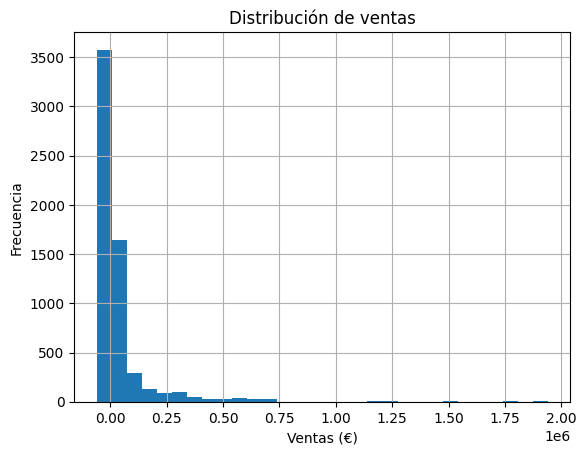

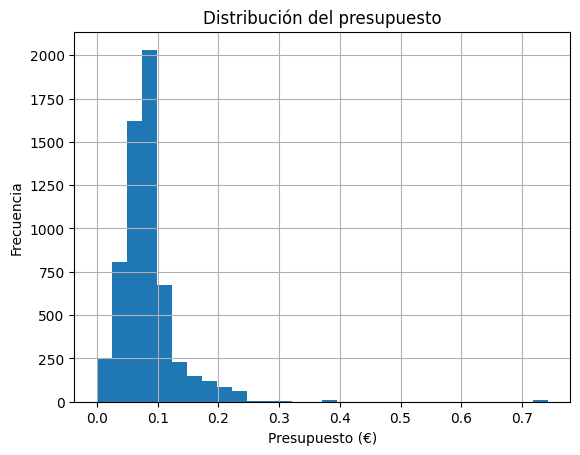

In [50]:
df3['ventas_(€)'].hist(bins=30)
plt.title('Distribución de ventas')
plt.xlabel('Ventas (€)')
plt.ylabel('Frecuencia')
plt.show()

df3['presupuesto_mes'].hist(bins=30)
plt.title('Distribución del presupuesto')
plt.xlabel('Presupuesto (€)')
plt.ylabel('Frecuencia')
plt.show()

## Boxplots

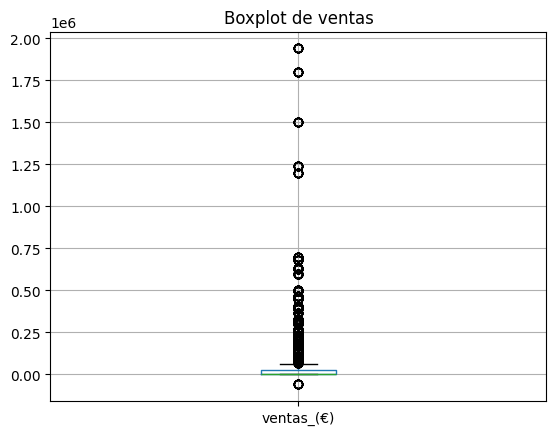

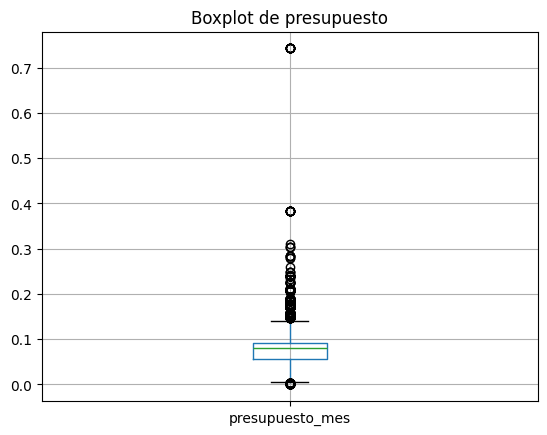

In [51]:
df3.boxplot(column=['ventas_(€)'])
plt.title('Boxplot de ventas')
plt.show()

df3.boxplot(column=['presupuesto_mes'])
plt.title('Boxplot de presupuesto')
plt.show()

## Guardar cambios realizados

In [52]:
df3.to_excel("C:/Users/smp/OneDrive - Grupo JJChicolino/THE POWER/PROYECTOFINALEDA/data/output/presupuesto2024_limpio.xlsx", index=False)